This notebook follows a NIRCam example. See the file 20240416a_solve_for_nircam_weights.ipynb for more information.

In [40]:
# Standard packages
using Revise, Glob, FITSIO, HDF5, Plots, FFTW, Statistics

# Load SIRS
using SIRS

# Definitions. I am working on the National Center for Climate Simulation (NCCS)
# high performance Prism cluster.
prog_id = "01497"                         # The input data are from this Program ID
datdir = "/lscratch/brausche"             # Stage data to Prism's high speed disks
outdir = "/explore/nobackup/people/brausche"*
                "/data/JWST/Library/SIRS" # Write results here
nint = 2                                  # Number of integrations per exposure
nframe = 120                              # This many frames per integration
nz = 30                                   # Work in "chunks" of this many frames to fit in GPU RAM

# The flight data have many cosmic rays. Instantiate the
# cosmic ray fixer.
F = CRFix(nframe);

In [21]:
# Get input files
files = glob("*_nis_*.fits", datdir);

In [22]:
# Do it
f, γ, ζ, ps_𝓵, ps_𝓻, ps_𝓷 = nircam_sirs_solve(F, nz, files)

# Save
SIRS.h5write(prog_id, Float32.(f), γ, ζ, ps_𝓵, ps_𝓻, ps_𝓷,
                ["nis",], outdir*"/20240430_sirs_niriss.h5")

processing jw01497001001_02301_00001_nis_refpixstep.fits integration 1
processing jw01497001001_02301_00001_nis_refpixstep.fits integration 2
processing jw01497001001_02301_00001_nis_refpixstep.fits integration 3
processing jw01497001001_02301_00001_nis_refpixstep.fits integration 4
processing jw01497001001_02301_00001_nis_refpixstep.fits integration 5
processing jw01497002001_02201_00001_nis_refpixstep.fits integration 1
processing jw01497002001_02201_00001_nis_refpixstep.fits integration 2
processing jw01497002001_02201_00001_nis_refpixstep.fits integration 3
processing jw01497002001_02201_00001_nis_refpixstep.fits integration 4
processing jw01497002001_02201_00001_nis_refpixstep.fits integration 5
processing jw01497003001_04201_00001_nis_refpixstep.fits integration 1
processing jw01497003001_04201_00001_nis_refpixstep.fits integration 2
processing jw01497003001_04201_00001_nis_refpixstep.fits integration 3
processing jw01497003001_04201_00001_nis_refpixstep.fits integration 4
proces

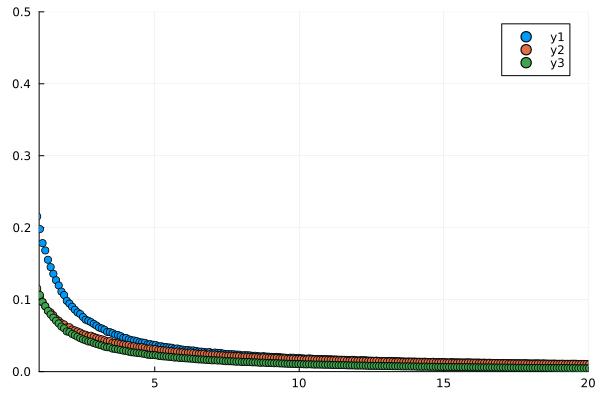

In [45]:
x = rfftfreq(2048, 1/(524*10.e-6)) # Frequency
scatter(x[2:end], ps_𝓵[2:end])
scatter!(x[2:end], ps_𝓻[2:end])
scatter!(x[2:end], mean(ps_𝓷[2:end,:], dims=2))
scatter!(xlim=[1,20], ylim=(0,.5))

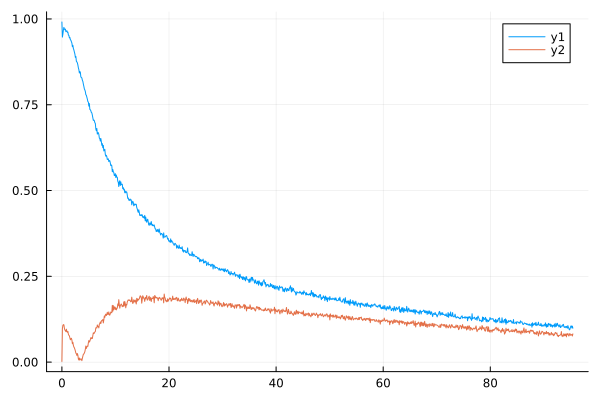

In [38]:
op = 1
plot(x,[abs.(γ[:,op]),abs.(ζ[:,op])])

In [26]:
size(ζ)

(1025, 4)